In [298]:
import numpy as np
import seaborn as sns
import sys

In [299]:
class MDP:
    
    def __init__(self,size):
        self.grid = np.zeros((size,size),dtype="str")
        self.grid[:,:]="0"
        self.grid[0][0] = "G"
        self.grid[3:4 ,:size-1] = "*"
        self.initialPosition = (0,size-1)
        self.goalPosition = (0,0)
        self.grid[self.initialPosition[1]][self.initialPosition[0]] = "A"
        self.moveList = []
        
    def currentState(self):
        return self.grid
    
    def agentPosition(self):
        
        for col in range(self.grid.shape[0]):
            for row in range(self.grid.shape[0]):
                
                if self.grid[row][col] == "A":
                    return (row,col)
        
        

        
    def move(self,action):
        curPosition = self.agentPosition()
        
        agentXPosition = curPosition[0]
        agentYPosition = curPosition[1]
        
        
        if action == "North":
            if agentXPosition > 0 and self.grid[agentXPosition - 1][agentYPosition] != "*":
                agentXPosition = agentXPosition - 1
                self.grid[agentXPosition][agentYPosition] = "A"
                self.grid[curPosition[0]][curPosition[1]] = "#"
                self.moveList.append(action)
                
                
        if action == "South":
            if agentXPosition < 6 and self.grid[agentXPosition + 1][agentYPosition] != "*":
                agentXPosition = agentXPosition + 1
                self.grid[agentXPosition][agentYPosition] = "A"
                self.grid[curPosition[0]][curPosition[1]] = "#"
                self.moveList.append(action)
                
        if action == "West":
            if agentYPosition > 0 and self.grid[agentXPosition][agentYPosition - 1] != "*":
                agentYPosition = agentYPosition - 1
                self.grid[agentXPosition][agentYPosition] = "A"
                self.grid[curPosition[0]][curPosition[1]] = "#"
                self.moveList.append(action)
                
        if action == "East":
            if agentYPosition < 6 and self.grid[agentXPosition][agentYPosition + 1] != "*":
                agentYPosition = agentYPosition + 1
                self.grid[agentXPosition][agentYPosition] = "A"
                self.grid[curPosition[0]][curPosition[1]] = "#"
                self.moveList.append(action)
                
        
        
       
    
    def reward(self):
        
        if self.agentPosition() == self.goalPosition:
            return 20
        else:
            return -1
        
        
    def epsilon_greedy(self,eps,N):
        # Import required libraries
        actions = [0,0,0,0] # Index will correspond to the corresponding cardinal direction [N,S,E,W]

        num_times_explored=0
        num_times_exploited=0


        north_move_list = []
        south_move_list = []
        east_move_list = []
        west_move_list = []
        
        data = np.zeros((N,4))
        total_rewards = 0


        for i in range(N):
            # epsilon greedy


            p = np.random.random()

            # Explore Scenario
            if p < eps:
                num_times_explored += 1
                j = np.random.randint(4)

                if j == 0:
                    self.move("North")
                    north_move_list.append(self.reward())
                    self.moveList.append("North")
                    ave = 0
                    if len(north_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(north_move_list)/len(north_move_list)

                    actions[j] = ave


                if j == 1:
                    self.move("South")
                    south_move_list.append(self.reward())
                    self.moveList.append("South")
                    ave = 0
                    if len(south_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(south_move_list)/len(south_move_list)

                    actions[j] = ave



                if j == 2:
                    self.move("East")
                    east_move_list.append(self.reward())
                    self.moveList.append("East")
                    ave = 0
                    if len(east_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(east_move_list)/len(east_move_list)

                    actions[j] = ave
                    
                
                if j == 3:
                    self.move("West")
                    west_move_list.append(self.reward())
                    self.moveList.append("West")
                    ave = 0
                    if len(west_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(west_move_list)/len(west_move_list)

                    actions[j] = ave




            # Exploit Scenario

            else:

                # Selecting the bandit with the highest win rate estimate so far
                num_times_exploited += 1
                j = np.argmax([a for a in actions])
                if j == 0:
                    self.move("North")
                    north_move_list.append(self.reward())
                    self.moveList.append("North")
                    ave = 0
                    if len(north_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(north_move_list)/len(north_move_list)
                        

                    actions[j] = ave


                if j == 1:
                    self.move("South")
                    south_move_list.append(self.reward())
                    self.moveList.append("South")
                    ave = 0
                    if len(south_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(south_move_list)/len(south_move_list)

                    actions[j] = ave


                if j == 2:
                    self.move("East")
                    east_move_list.append(self.reward())
                    self.moveList.append("East")
                    ave = 0
                    if len(east_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(east_move_list)/len(east_move_list)

                    actions[j] = ave



                if j == 3:
                    self.move("West")
                    west_move_list.append(self.reward())
                    self.moveList.append("West")
                    ave = 0
                    if len(west_move_list) == 0:
                        ave = 0
                    else:
                        ave = sum(west_move_list)/len(west_move_list)

                    actions[j] = ave


            # for the plot
            for row in range(N):
                for col in range(4):
                    data[row][col] = actions[col]
            
            
            
            
            if self.agentPosition() == self.goalPosition:
                break
                    
        r = []
        r.extend(south_move_list)
        r.extend(west_move_list)
        r.extend(north_move_list)
        r.extend(east_move_list)
        
        

        print(f"num_times_exploited : {num_times_exploited}")
        print(f"num_times_explored  : {num_times_explored}")
        
        print(self.currentState())
        print(self.moveList,"\n")
        


        return sum(r)
    
    
    def randomAgent(self,N):
        actions = [0,0,0,0] # Index will correspond to the corresponding cardinal direction [N,S,E,W]

        

        north_move_list = []
        south_move_list = []
        east_move_list = []
        west_move_list = []
        
        for i in range(N):
            j = np.random.randint(4)

            if j == 0:
                self.move("North")
                north_move_list.append(self.reward())
                self.moveList.append("North")
                ave = 0
                if len(north_move_list) == 0:
                    ave = 0
                else:
                    ave = sum(north_move_list)/len(north_move_list)

                actions[j] = ave


            if j == 1:
                self.move("South")
                south_move_list.append(self.reward())
                self.moveList.append("South")
                ave = 0
                if len(south_move_list) == 0:
                    ave = 0
                else:
                    ave = sum(south_move_list)/len(south_move_list)

                actions[j] = ave



            if j == 2:
                self.move("East")
                east_move_list.append(self.reward())
                self.moveList.append("East")
                ave = 0
                if len(east_move_list) == 0:
                    ave = 0
                else:
                    ave = sum(east_move_list)/len(east_move_list)

                actions[j] = ave


            if j == 3:
                self.move("West")
                west_move_list.append(self.reward())
                self.moveList.append("West")
                ave = 0
                if len(west_move_list) == 0:
                    ave = 0
                else:
                    ave = sum(west_move_list)/len(west_move_list)

                actions[j] = ave
                
                
            
            


            if self.agentPosition() == self.goalPosition:
                break
                    
        r = []
        r.extend(south_move_list)
        r.extend(west_move_list)
        r.extend(north_move_list)
        r.extend(east_move_list)
        print(self.currentState())
        print(self.moveList,"\n")
        return sum(r)

            

    

In [300]:


agentType = []
agentAveReward = []

rewards_list = [] 

for i in range(20):
    
    model = MDP(7)
    eps = 0.8
    N = 50
    print("Epsilon greedy agent\n")
    print(model.grid,"\n")
    r = model.epsilon_greedy(eps,N)
    rewards_list.append(r)
agentAveReward.append(sum(rewards_list)/len(rewards_list))
agentType.append("Epsilon greedy")

Epsilon greedy agent

[['G' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['*' '*' '*' '*' '*' '*' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['A' '0' '0' '0' '0' '0' '0']] 

num_times_exploited : 16
num_times_explored  : 34
[['G' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['*' '*' '*' '*' '*' '*' '0']
 ['#' '#' '#' '#' '0' '0' '0']
 ['#' '#' '#' '#' '0' '0' '0']
 ['#' 'A' '#' '#' '0' '0' '0']]
['East', 'East', 'North', 'North', 'East', 'East', 'East', 'East', 'North', 'North', 'South', 'South', 'West', 'West', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'North', 'West', 'West', 'West', 'West', 'North', 'West', 'North', 'North', 'East', 'East', 'North', 'South', 'South', 'East', 'East', 'North', 'North', 'East', 'East', 'North', 'North', 'West', 'West', 'North', 'South', 'South', 'South', 'South', 'West', 'West', 'North', 'North', 'West', 'West', 'East', 'E

In [301]:

rewards_list = [] 

for i in range(20):
    
    Model = MDP(7)
    M = 50
    print("Random agent\n")
    print(Model.grid,"\n")
    r = Model.randomAgent(N)
    rewards_list.append(r)
agentAveReward.append(sum(rewards_list)/len(rewards_list))
agentType.append("Random")


Random agent

[['G' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['*' '*' '*' '*' '*' '*' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['A' '0' '0' '0' '0' '0' '0']] 

[['G' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['0' '0' '0' '0' '0' '0' '0']
 ['*' '*' '*' '*' '*' '*' '0']
 ['0' '#' '#' '#' '#' '#' '0']
 ['#' '#' 'A' '#' '#' '0' '0']
 ['#' '#' '#' '0' '0' '0' '0']]
['East', 'East', 'East', 'East', 'North', 'North', 'North', 'North', 'West', 'West', 'South', 'South', 'West', 'West', 'East', 'East', 'South', 'South', 'West', 'West', 'East', 'East', 'East', 'East', 'South', 'South', 'South', 'West', 'West', 'South', 'West', 'West', 'East', 'East', 'West', 'West', 'South', 'West', 'East', 'East', 'South', 'West', 'West', 'East', 'East', 'North', 'North', 'West', 'West', 'West', 'East', 'East', 'North', 'North', 'South', 'South', 'East', 'East', 'East', 'East', 'East', 'East', 'North', 'North', 'North', 'Eas

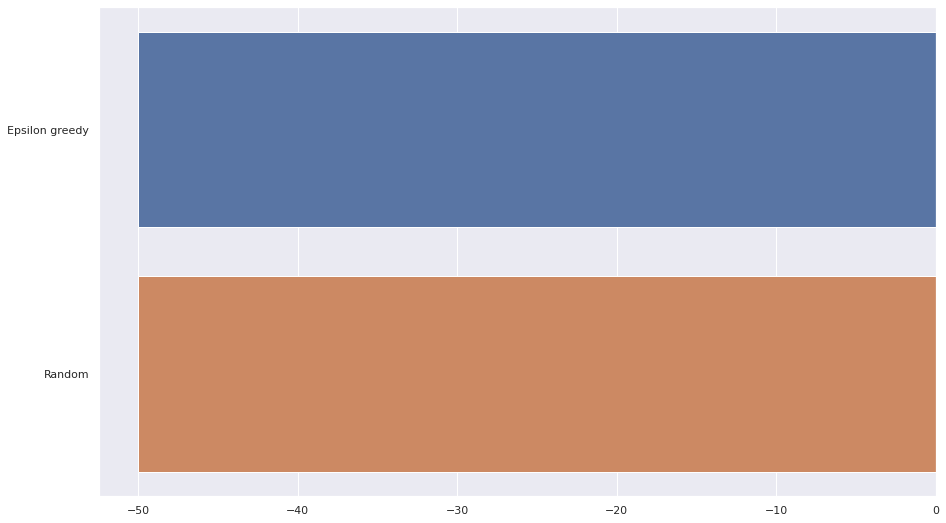

In [302]:
sns.set(rc={'figure.figsize':(15,9)})
sns.barplot(y=agentType, x=agentAveReward).get_figure().savefig("bargraph.png")